In [4]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../')
from hms_pipeline.project_configs import HMS_CONFIG

from hms_pipeline.spec_dataset import SpecDataset


In [5]:
import matplotlib.pyplot as plt
import numpy as np
def display_dataset_sample(dataset, random_sample = False):
    plt.figure(figsize=(30, 10))
    print(len(dataset))


    for i in range(5):
        if random_sample:
            idx = np.random.randint(0, len(dataset))
        else:
            idx = i
        sample = dataset[idx]
        spec = sample['spec_img']
        meta = sample['metadata']
        print(sample["kl_weight"])
        # raw_eeg_img = sample['raw_eeg_img']
        print(spec.min(), spec.max())
        print(meta)
        label = sample['label']
        print(label)
        # print the type of the sample
        print(spec.shape)

        plt.subplot(1, 5, i+1)        

        plt.imshow(spec[0])

    plt.show()

# Test the Dataloader on Preprocessed Dataset

{'lrflip_prob': 0.0, 'fbflip_prob': 0.0, 'mask_prob': 0.0, 'keep_center_ratio': 0.0, 'hflip_prob': 0.0, 'blur_prob': 0.0, 'roll_prob': 0.0, 'neg_eeg_prob': 0.0, 'contrast_prob': 0.0, 'fuse_prob': 0.0, 'block_prob': 0.0, 'noise_prob': 0.0, 'mask_iter': 5, 'mask_size_ratio': 0.1, 'num_block_ch': 4, 'dummy_votes_prob': 0.0, 'num_dummy_votes': 1}
16045
tensor(1.)
tensor(-0.8753) tensor(0.7143)
{'eeg_id': 1521463386, 'eeg_sub_id': 0, 'eeg_label_offset_seconds': 0.0, 'spectrogram_id': 703864045, 'spectrogram_sub_id': 0, 'spectrogram_label_offset_seconds': 0.0, 'label_id': 1442205494, 'patient_id': 27477, 'expert_consensus': 'GRDA', 'seizure_vote': 2, 'lpd_vote': 0, 'gpd_vote': 0, 'lrda_vote': 0, 'grda_vote': 9, 'other_vote': 4, 'fold': 4, 'central_id': '1521463386_0', 'nonoverlap_eeg_id': '1521463386_0', 'unique_label': '1521463386_2_0_0_0_9_4', 'unique_id': '1521463386_0', 'total_votes': 15, 'kl_div': 0.8641422, 'fused_id': 0}
[0.13333334 0.         0.         0.         0.6        0.266666

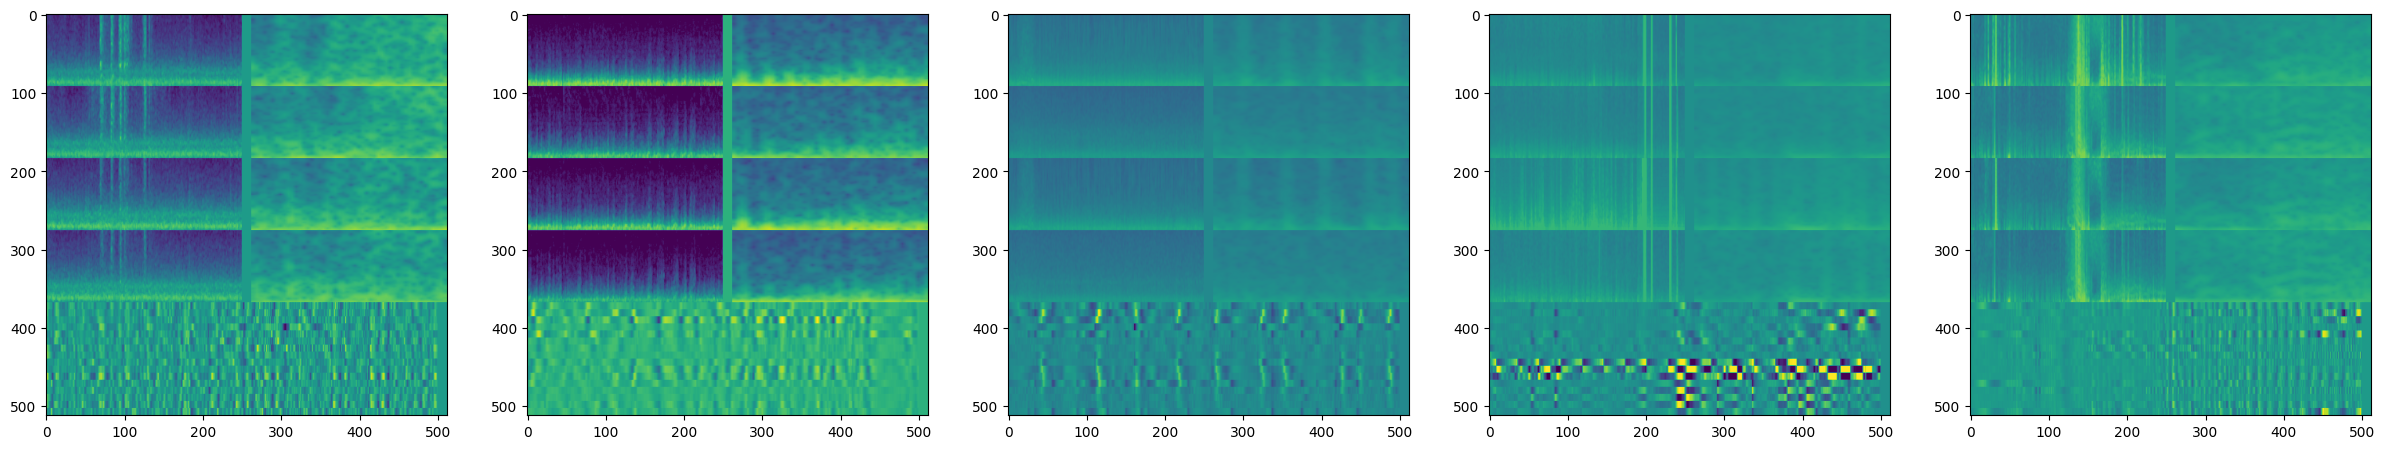

In [6]:
train_df_path = "/home/maxc/workspace/kaggle-hms/folds/train_fold_0.csv"
train_df = pd.read_csv(train_df_path)
test_ds_configs = dict(
    train_dataset_group = "unique_label",
    val_dataset_group = "unique_label",


    raw_eeg_dir =  "/home/maxc/workspace/kaggle-hms/data/v6/raw_eegs_sosbandclip_2500",
    # eeg_spec_dir = "/home/maxc/workspace/kaggle-hms/data/v4/eeg_specs_h100w250gf5fft1024wl200sospflc05_norm_const",
    # eeg_spec_dir = "/home/maxc/workspace/kaggle-hms/data/v4/eeg_specs_h100w500gf10fft1024wl200lc05_norm_const",
    # eeg_spec_dir = "/home/maxc/workspace/kaggle-hms/data/v6/eeg_specs_h100w250gf5fft1024wl250lc05_norm_const",
    eeg_spec_dir = "/home/maxc/workspace/kaggle-hms/data/v6/eeg_specs_h100w250gf5fft1024wl200lc05_norm_const",

    long_spec_dir= "/home/maxc/workspace/kaggle-hms/data/v6/long_specs",
    
    l7_weight = 0.25, # extra inverse weight for votes less than 7
    vote_weight = False,
    inverse_kl_weight=False,
    
    # inverse_kl_weight = False,

    img_types=["raw_eeg", "ceeg_spec", "long_spec"],
    
    # so far best order
    signals=["LL", "RL", "LP", "RP"],
    lrflip_signals=["RL", "LL", "RP", "LP"],

    # center_timespan = 10,
    center_timespan = 20,
    img_size=[512, 512],
    long_spec_ratio = 1.0,
    sub_img_size={
        "eeg_spec": [368, 250],
        "long_spec": [368, 250],
        "raw_eeg": [144, 500],
        "full_raw_eeg": [72, 500],
    },

   
    sub_img_vflips={
        "eeg_spec": [False, False, False, False],
        # "eeg_spec": [True, False, True, False],
        "long_spec": [False, False, False, False],
        # "long_spec": [False, True, False, False],
        "raw_eeg": [False, False, False, False],
        "raw_eeg": [False, False, True, True],
    },
    train_aug_probs={
        "lrflip_prob": 0.5,
        "fbflip_prob": 0.5,  # front back flip
        "mask_prob": 0.5,
        "keep_center_ratio": 0.2,
        "hflip_prob": 0.5,
        "blur_prob": 0.5,
        "roll_prob": 0.0,
        "neg_eeg_prob": 0.5,
        "contrast_prob": 0.5,
        "fuse_prob": 0.5,
        "block_prob": 0.5,
        "noise_prob": 0.0,
        "mask_iter": 3,
        "mask_size_ratio": 0.2,
        "num_block_ch": 4,
        "dummy_votes_prob": 0.0,
        "num_dummy_votes": 1,
    },  # sofar best aug


    val_aug_probs={
        "lrflip_prob": 0.0,
        "fbflip_prob": 0.0,
        "mask_prob": 0.0,
        "keep_center_ratio": 0.0,
        "hflip_prob": 0.0,
        "blur_prob": 0.0,
        "roll_prob": 0.0,
        "neg_eeg_prob": 0.0,
        "contrast_prob": 0.0,
        "fuse_prob": 0.0,
        "block_prob": 0.0,
        "noise_prob": 0.0,
        "mask_iter": 5,
        "mask_size_ratio": 0.1,
        "num_block_ch": 4,
        "dummy_votes_prob": 0.0,
        "num_dummy_votes": 1,
    },
)

train_eeg_dataset = SpecDataset(train_df, test_ds_configs, train=False)
display_dataset_sample(train_eeg_dataset, random_sample=True)

In [7]:
# check if an id is in 